# Supervised Learning: Classification Project 3 - Personal Loan Campaign
## Paige Singleton
## June 2022

## Section 1 Understand the DataSet - EDA

### Problem Definition
- Given customer liability (depositor data) for All Life Bank, "predict whether a Liabiity customer will buy a personal loan or not." Also, determine which variables are most significant and which segment of customers should be targeted.

In [1]:
#EDA/CDA Librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# Decision Tree Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)




In [2]:
#Read csv file and make a copy for EDA; create 4 copies of data for eda and cleaning for 2 types of models
data = pd.read_csv("Loan_Modelling.csv")
lr_eda=data.copy()
lr_clean=data.copy()
dt_eda=data.copy()
dt_clean=data.copy()

In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
lr_eda[lr_eda.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Display 10 random rows

np.random.seed(1)
lr_eda.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [10]:
# Understand the number of unique values in each column
lr_eda.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

## EDA Initial Observations
### Dataset
- 5000 rows and 14 columns
- all columns are dtype numerical
- no missing values
- unique value count indicates that several variables might be better typed as categorical although for regression types should be numerical therefore this step may ony be necessary for EDA

### Variables
- ID: Customer ID: likely a primary key (sequential) which matches the row index of the dataframe; 
    - variable will NOT be informational and should not be used in the model.
- Age: Customer's age in completed years; Age ranges from 23 5o 67 with mean and median  of approx 45; 
    - value is an integer; explore using histogram and boxplot for variance and outliers
- Experience: Number of years of professional experience;  Experience ranges from -3 to 43 with a median of 20 and mean of ~20
    - value is an integer; explore using histogram and boxplot for variance and outliers
- Income: Annual Income of the customer (in thousands of dollars); Income ranges from 8000 to 224000 with a median of 64000 and a mean of ~74000;
    - Income is skewed right
    - value is an integer; explore using histogram and boxplot for variance and outliers
    - consider scaling data after test train split
- Zip Code: Home address Zip Code
    - value is currently an integer data type; consider other dtypes such as categorical for this variable
    - Possible feature engineering: combine zip codes based on location (State/county)
- Family: Family size of the customer; family is an integer ranging from 1 to 4 with median of 2 and mean of ~2.4;
    - consider changing this variable to categorical for EDA
- CCAvg: Average spending on credit cards per month (in thousands of dollars); CC Average ranges from 0 to 10000 with a median of 1500 and a mean of ~1938 dollars
    - CCAvg is skewed right
    - value is an float; explore using histogram and boxplot for variance and outliers
    - consider scaling data after test train split
- Education: Education level 1:Undergrad; 2:Graduate, 3:Advanced/Professional
    - consider changing this variable to categorical for EDA
- Mortgage: Value of house mortgage, if any in thousands of dollars; Mortgage ranges from 0 to 635000 with a median of 0 an mean of ~56499
    - Mortgage is heavily skewed right
    - value is an integer; explore using histogram and boxplot for variance and outliers;
    - consider scaling data after test train split
- Personal_Loan: Did the customer accept a personal loan in the last campaign
    - consider changing the variable to categorical for EDA
- Securities_Account: Does the customer have a securities account with the bank
    - consider changing this variable to categorical for EDA
- CD_Account: Does the customer have a certificate of deposit account with the bank
    - consider changing this variable to categorical for EDA
- Online: Do customers use internet banking facilities
    - consider changing this variable to categorical for EDA
- CreditCard: Does the customer usee a credit card issued by any other Bank (excluding All Life Bank)?
    - consider changing this variable to categorical for EDA


In [11]:
### Univariate Analysis

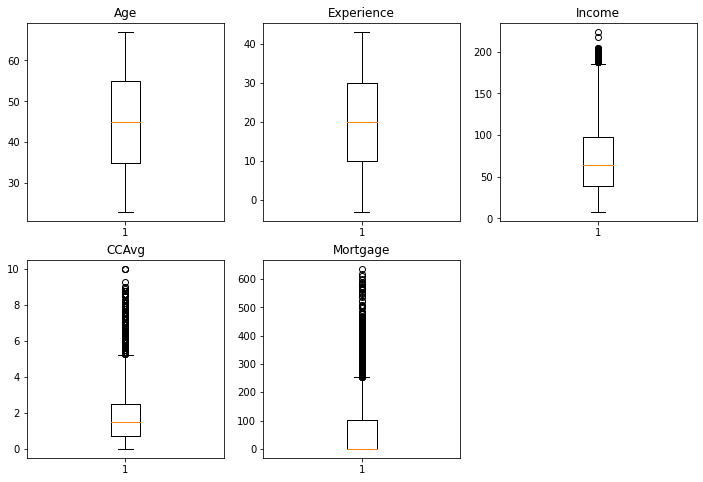

In [12]:

# Create boxplots for numerical columns with outliers displayed 
num_cols = ['Age','Experience','Income','CCAvg','Mortgage']

plt.figure(figsize = (12,8))

for i, variable in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.boxplot(lr_eda[variable],whis=1.5)
    plt.tight_layout
    plt.title(variable)
    
plt.show()

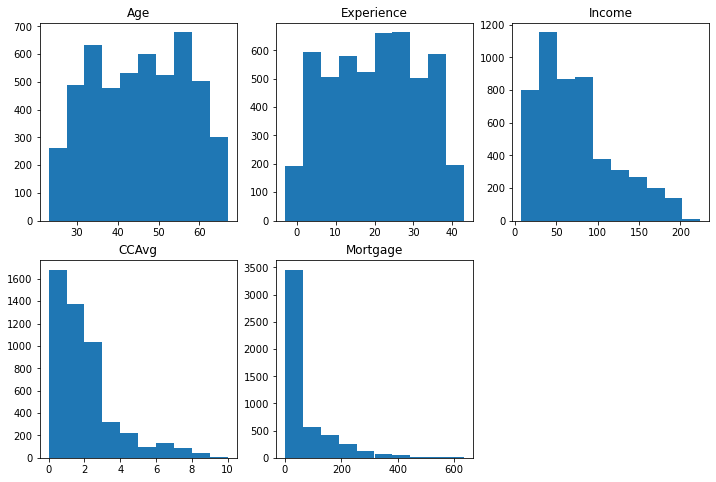

In [13]:
#Create histplots for numerical variables

plt.figure(figsize = (12,8))

for i, variable in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.hist(lr_eda[variable])
    plt.tight_layout
    plt.title(variable)
    
plt.show()

### Observations on Numerical variables
- Data skew is as expected
    - After test/train split, use MinMax scaling on Income and log scaling on CCAvg and Mortgage

In [14]:
#Count the values in the categorical columns for eda

cat_cols = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
for col in cat_cols:
    lr_eda[col] = lr_eda[col].astype('category')
    print(col)
    print(lr_eda[col].value_counts())
    print("_________________________________")

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
_________________________________
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
_________________________________
Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64
_________________________________
Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64
_________________________________
CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64
_________________________________
Online
1    2984
0    2016
Name: Online, dtype: int64
_________________________________
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
_________________________________


In [15]:
# function to create labeled barplots (code from Income Group classification Case Study)
#code taken from 

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Family


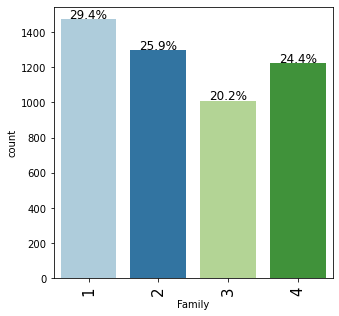

 ****************************************************************** 
Education


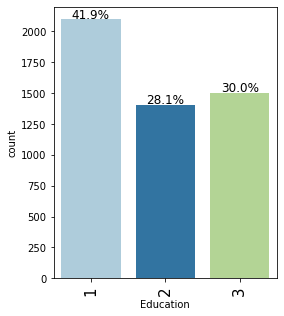

 ****************************************************************** 
Personal_Loan


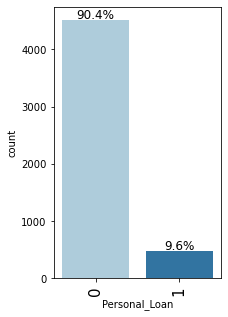

 ****************************************************************** 
Securities_Account


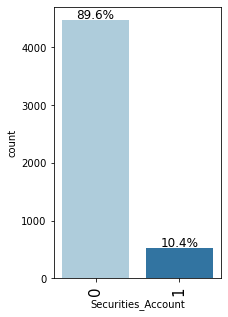

 ****************************************************************** 
CD_Account


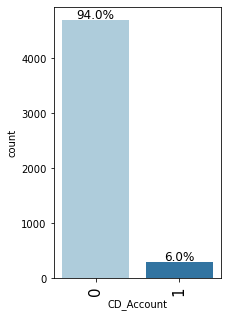

 ****************************************************************** 
Online


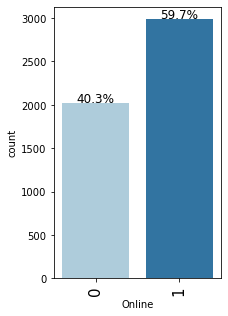

 ****************************************************************** 
CreditCard


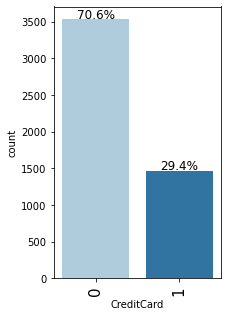

 ****************************************************************** 


In [16]:
## Barplot for the categorical features
for col in cat_cols:
    print(col)
    labeled_barplot(lr_eda, col, perc=True)
    plt.show()
    print(
        " ****************************************************************** "
    )  ## To create a separator

### Observations on Categorical Variables
- Possible relationship among the following variables: Securities_Account, Personal Loan, and CD_account and possibly Credit Card.
    - Question: do the same customers have multiple accounts of different types
    Explore using groupby functions then correlation matrix

### Zip code Feature Engineering (convert 467 zipcodes to 38 counties)

In [17]:
#resolves ssl certificate error for code in cell that follows
#https://moreless.medium.com/how-to-fix-python-ssl-certificate-verify-failed-97772d9dd14c
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
#query for geodata associated to postal code - test query
#https://www.journaldev.com/49094/find-address-from-zip-code-in-python
import pgeocode
data = pgeocode.Nominatim('US')
print(data.query_postal_code("35976"))

postal_code              35976
country_code                US
place_name        Guntersville
state_name             Alabama
state_code                  AL
county_name           Marshall
county_code                 95
community_name             NaN
community_code             NaN
latitude               34.3449
longitude             -86.2752
accuracy                     4
Name: 0, dtype: object


In [19]:
#create list of county/state associated to data ZIPCode
state = []
county=[]
zip = lr_eda['ZIPCode']
for i in zip:
    df=data.query_postal_code(i)
    st=df['state_name']
    ct=df['county_name']
    state.append(st)
    county.append(ct)


In [20]:
# Add county/state columns to dataset
lr_eda['state']=state
lr_eda['county']=county  
lr_eda.nunique()    

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
state                    1
county                  38
dtype: int64

In [21]:
## add county/state columns to all data sets
lr_clean['state']=state
lr_clean['county']=county

dt_clean['county']=county
dt_clean['state']=state
dt_eda['state']=state
dt_eda['county']=county

lr_eda.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,state,county
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,California,Los Angeles
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,California,Los Angeles
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,California,Alameda
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,California,City and County of San Francisco
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,California,Los Angeles


<AxesSubplot:xlabel='Income'>

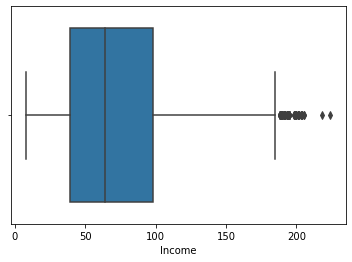

In [22]:
### Check Income for outliers
sns.boxplot(data=lr_eda, x='Income')

In [23]:
lr_eda.Income.quantile(.9995)

205.0

In [24]:
lr_eda.loc[(lr_eda['Income']>205)].sort_values(by='Income')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,state,county
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0,California,Los Angeles
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,California,Monterey


In [25]:
### Observation: Box plot shows 2 outliers that are significant: 218 and 224

## Bivariate analysis

### Use Groupby functions to explore relationship among Securities_Account, Personal Loan, and CD_account and possibly Credit Card

In [26]:
lr_eda.groupby('Personal_Loan').Securities_Account.value_counts()

Personal_Loan  Securities_Account
0              0                     4058
               1                      462
1              0                      420
               1                       60
Name: Securities_Account, dtype: int64

In [27]:
lr_eda.groupby('Personal_Loan').CD_Account.value_counts()

Personal_Loan  CD_Account
0              0             4358
               1              162
1              0              340
               1              140
Name: CD_Account, dtype: int64

In [28]:
lr_eda.groupby('CD_Account').Securities_Account.value_counts()

CD_Account  Securities_Account
0           0                     4323
            1                      375
1           0                      155
            1                      147
Name: Securities_Account, dtype: int64

In [29]:
lr_clean['Personal_Loan'].corr(lr_clean['Securities_Account'])

0.021953882216311366

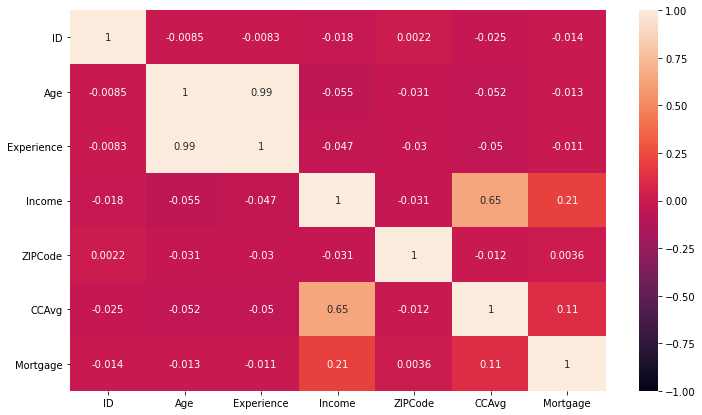

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(lr_eda.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

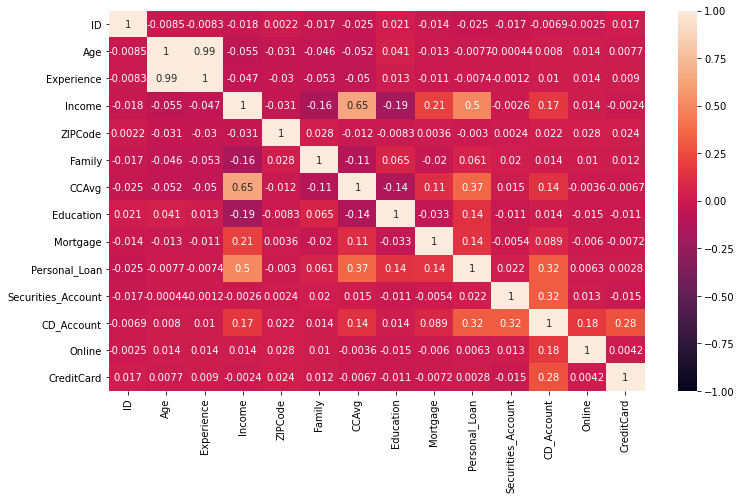

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(lr_clean.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

### There is no strong correlation between the variables
Question: Does the location (county) impact other variables, especially target variable, Personal Loan?

## Explore Relationship between location and Personal Loan 

In [32]:
#Group Personal Loan by County
lr_eda[lr_eda['Personal_Loan']==1].groupby('county').Personal_Loan.value_counts()

county                            Personal_Loan
Alameda                           1                 44
Butte                             1                  2
City and County of San Francisco  1                 19
Contra Costa                      1                 12
El Dorado                         1                  1
Fresno                            1                  2
Humboldt                          1                  2
Kern                              1                  7
Los Angeles                       1                111
Marin                             1                  6
Mendocino                         1                  1
Monterey                          1                 15
Orange                            1                 29
Placer                            1                  2
Riverside                         1                  6
Sacramento                        1                 15
San Bernardino                    1                  3
San Diego        

In [33]:
#Change to Percentages and sort
x=(lr_eda.groupby('county').Personal_Loan.value_counts(normalize=True))*100

x.sort_values()


county                            Personal_Loan
San Bernardino                    1                  2.970297
El Dorado                         1                  5.882353
San Mateo                         1                  5.882353
Yolo                              1                  6.153846
Humboldt                          1                  6.250000
Stanislaus                        1                  6.666667
Santa Barbara                     1                  7.142857
City and County of San Francisco  1                  7.392996
San Joaquin                       1                  7.692308
Fresno                            1                  7.692308
Sacramento                        1                  8.152174
Placer                            1                  8.333333
Orange                            1                  8.734940
Alameda                           1                  8.800000
Solano                            1                  9.090909
Ventura               

In [34]:
# Sonoma County appears to have largest loan acceptance rate (~21.4%); use this value to filter results;
# Sort to determine counties with lowest and highest loan acceptance rates
x.loc[x<78].sort_values()

county                            Personal_Loan
San Bernardino                    1                 2.970297
El Dorado                         1                 5.882353
San Mateo                         1                 5.882353
Yolo                              1                 6.153846
Humboldt                          1                 6.250000
Stanislaus                        1                 6.666667
Santa Barbara                     1                 7.142857
City and County of San Francisco  1                 7.392996
Fresno                            1                 7.692308
San Joaquin                       1                 7.692308
Sacramento                        1                 8.152174
Placer                            1                 8.333333
Orange                            1                 8.734940
Alameda                           1                 8.800000
Solano                            1                 9.090909
Ventura                           1  

## Explore relationship between location and mortgage 

In [35]:
#Describe Mortgage data
lr_eda[['Mortgage']].describe()

,Mortgage
count,5000.000000
mean,56.498800
std,101.713802
min,0.000000
25%,0.000000
50%,0.000000
75%,101.000000
max,635.000000


In [36]:
#Understand the mean mortgage per county
mbc=lr_eda.groupby('county').Mortgage.mean()
mbc.sort_values()

county
Trinity                               0.000000
Merced                                0.000000
Placer                               24.666667
San Luis Obispo                      29.787879
Marin                                38.555556
Humboldt                             39.593750
Riverside                            43.160714
Solano                               46.727273
Fresno                               51.384615
El Dorado                            53.764706
Alameda                              53.770000
Santa Clara                          54.158082
Contra Costa                         54.482353
Yolo                                 54.938462
Los Angeles                          56.034703
Siskiyou                             56.285714
San Diego                            56.292254
San Mateo                            56.348039
Monterey                             56.562500
Kern                                 56.648148
Ventura                              56.807018
Orange

In [37]:
mbc.nunique()

37

In [38]:
#Understand the count of mortgages per county
mdc_count=lr_eda.groupby('county').county.count()
mdc_count.sort_values()

county
Napa                                   3
Imperial                               3
Merced                                 4
Lake                                   4
Trinity                                4
Siskiyou                               7
Tuolumne                               7
Mendocino                              8
San Joaquin                           13
San Benito                            14
Stanislaus                            15
El Dorado                             17
Shasta                                18
Butte                                 19
Placer                                24
Fresno                                26
Sonoma                                28
Humboldt                              32
San Luis Obispo                       33
Solano                                33
Marin                                 54
Kern                                  54
Riverside                             56
Santa Cruz                            68
Contra Co

In [39]:
mbc.describe()

count     38.000000
mean      59.006576
std       24.032356
min        0.000000
25%       53.766029
50%       56.605324
75%       70.662541
max      131.625000
Name: Mortgage, dtype: float64

In [40]:
#Calculate the 99% of mortgage values
lr_eda.Mortgage.quantile(.99)

431.0100000000002

In [41]:
lr_eda.loc[(lr_eda['Mortgage']>=431)].count()

ID                    51
Age                   51
Experience            51
Income                51
ZIPCode               51
Family                51
CCAvg                 51
Education             51
Mortgage              51
Personal_Loan         51
Securities_Account    51
CD_Account            51
Online                51
CreditCard            51
state                 51
county                51
dtype: int64

## Check Income for impact of outliers

## EDA Summary
### Data Description
- 5000 rows and 14 columns
- all columns are dtype numerical
- no missing values
- unique value count indicates that several variables might be better typed as categorical although for regression types should be numerical therefore this step may ony be necessary for EDA
- ZIPCode column present a challenge with 467 values

### EDA Observations
- Customer ID: likely a primary key (sequential) which matches the row index of the dataframe; 
    - variable will NOT be informational and should not be used in the model.
- Age: Customer's age in completed years; Age ranges from 23 5o 67 with mean and median  of approx 45; 
    - value is an integer; Age does not have outliers
- Experience: Number of years of professional experience;  Experience ranges from -3 to 43 with a median of 20 and mean of ~20
    - value is an integer; Experience does not have null values or outliers
- Income: Annual Income of the customer (in thousands of dollars); Income ranges from 8000 to 224000 with a median of 64000 and a mean of ~74000;
    - Income is skewed right; Significant outliers are 218 and 224
- Zip Code: Home address Zip Code
    - Mapped ZIPCode to new features: state and county
    - County is more informative than ZIPCode; ZIPCode has 467 unique values whereas couty only has 38
- Family: Family size of the customer; family is an integer ranging from 1 to 4 with median of 2 and mean of ~2.4;
- CCAvg: Average spending on credit cards per month (in thousands of dollars); CC Average ranges from 0 to 10000 with a median of 1500 and a mean of ~1938 dollars
    - CCAvg is skewed right
    - outliers are not extreme and reasonable for problem
    - consider scaling data after test train split
- Education: Education level 1:Undergrad; 2:Graduate, 3:Advanced/Professional
    - consider changing this variable to categorical for EDA
- Mortgage: Value of house mortgage, if any in thousands of dollars; Mortgage ranges from 0 to 635000 with a median of 0 an mean of ~56499
    - Mortgage is heavily skewed right; outliers seem to be within an acceptable range for a lgo normal distribution
    - value is an integer;
- Personal_Loan: Did the customer accept a personal loan in the last campaign
    - consider changing the variable to categorical for EDA
- Securities_Account: Does the customer have a securities account with the bank
    - consider changing this variable to categorical for EDA
- CD_Account: Does the customer have a certificate of deposit account with the bank
    - consider changing this variable to categorical for EDA
- Online: Do customers use internet banking facilities
    - consider changing this variable to categorical for EDA
- CreditCard: Does the customer usee a credit card issued by any other Bank (excluding All Life Bank)?
    - consider changing this variable to categorical for EDA
### Data Cleaning for logistic regression
- ID: Remove ID from Dataset
- Age: No cleaning needed
- Experience: No cleaning needed
- Income: Impute outliers 218 and 224 for 99.9 percentile 205; After test/train split, use MinMax scaling
- ZIPCode
    - Drop new feature 'state' as it contains a single value for all rows ('California') and therefor does not inform the model. 
    - Drop ZIPCode as it has been engineered to county which is more informative for the model.
- Family: convert family to categorical; convert categorical to dummy indicator variables
- CCAVG: Perform a log scale (after test/train split)
- Education: convert family to categorical; convert categorical to dummy indicator variables
- Mortgage: scale using log scale after test/train split
- Personal_Loan: target variable; no change to feature
- Securities account: no cleaning needed
- CD_Account: no cleaning needed
- ONline: no cleaning needed
- CreditCard:no cleaning needed




## Data Preparation for Logistic Regression

In [42]:
#Check dataset values
lr_clean.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,state,county
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,California,Los Angeles
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,California,Los Angeles
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,California,Alameda
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,California,City and County of San Francisco
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,California,Los Angeles


In [43]:
#check dataset unique values
lr_clean.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
state                    1
county                  38
dtype: int64

In [44]:
#remove non-informative variable
lr_clean.drop(['ID','state','ZIPCode'],axis=1,inplace=True)

In [45]:
#check that columns were dropped
lr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  county              4959 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [46]:
#Convert 3 columns to category dtype
lr_clean_cat_cols=['Family','Education','county']
for colname in lr_clean_cat_cols:
    lr_clean[colname] = lr_clean[colname].astype('category')
    
lr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  county              4959 non-null   category
dtypes: category(3), float64(1), int64(9)
memory usage: 407.2 KB


In [47]:
#Replace the Power2 NaN values with the Median
lr_clean['Income'] = lr_clean['Income'].fillna(lr_clean['Income'].quantile(.9995))

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#apply min-max transformation to Income data
lr_clean['Income_scale'] = MinMaxScaler().fit_transform(lr_clean[['Income']])

In [49]:
# Apply log transformation to mortgage and CCAVG data; check distribution of year_log
lr_clean["Mortgage_log"] = np.log(lr_clean["Mortgage"] + 1) 


In [50]:
# Apply log transformation to mortgage and CCAVG data; check distribution of year_log
lr_clean["CCAvg_log"] = np.log(lr_clean["CCAvg"] + 1) 


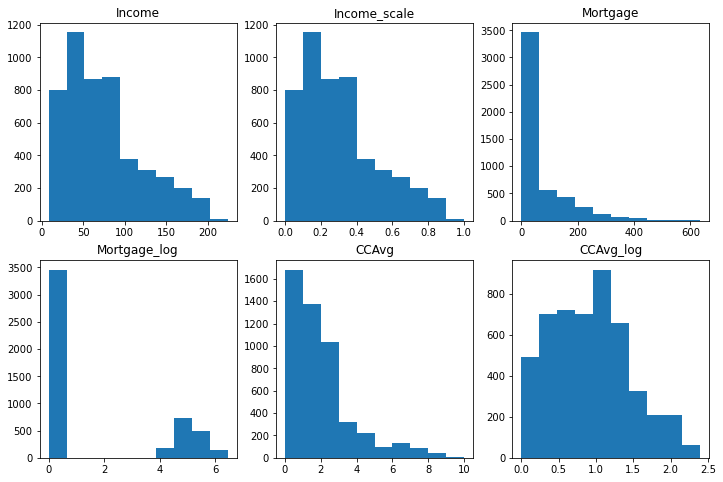

In [51]:
#Create histplots for numerical variables
scale_cols = ['Income','Income_scale','Mortgage','Mortgage_log','CCAvg','CCAvg_log']
plt.figure(figsize = (12,8))

for i, variable in enumerate(scale_cols):
    plt.subplot(2,3,i+1)
    plt.hist(lr_clean[variable])
    plt.tight_layout
    plt.title(variable)
    
plt.show()

In [52]:
lr_clean.drop(['Income','CCAvg','Mortgage'],axis=1,inplace=True)

In [53]:
lr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Family              5000 non-null   category
 3   Education           5000 non-null   category
 4   Personal_Loan       5000 non-null   int64   
 5   Securities_Account  5000 non-null   int64   
 6   CD_Account          5000 non-null   int64   
 7   Online              5000 non-null   int64   
 8   CreditCard          5000 non-null   int64   
 9   county              4959 non-null   category
 10  Income_scale        5000 non-null   float64 
 11  Mortgage_log        5000 non-null   float64 
 12  CCAvg_log           5000 non-null   float64 
dtypes: category(3), float64(3), int64(7)
memory usage: 407.2 KB


In [54]:
# Split data frame into dependent variable (y) and Independent Variables(X)
y = lr_clean["Personal_Loan"]
X = lr_clean.drop(["Personal_Loan"], axis=1)

In [55]:
#Copy X
X2=X.copy()

In [56]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["category",]).columns.tolist(),
    drop_first=True,
)

X.head()

,Age,Experience,Securities_Account,CD_Account,Online,CreditCard,Income_scale,Mortgage_log,CCAvg_log,Family_2,Family_3,Family_4,Education_2,Education_3,county_Butte,county_City and County of San Francisco,county_Contra Costa,county_El Dorado,county_Fresno,county_Humboldt,county_Imperial,county_Kern,county_Lake,county_Los Angeles,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Napa,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Solano,county_Sonoma,county_Stanislaus,county_Trinity,county_Tuolumne,county_Ventura,county_Yolo
0,25,1,1,0,0,0,0.189815,0.0,0.955511,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,1,0,0,0,0.120370,0.0,0.916291,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,0,0,0,0,0.013889,0.0,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,0,0,0,0,0.425926,0.0,1.308333,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,0,0,0,1,0.171296,0.0,0.693147,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

# Logistic Regression Model (using the code from "IncomeGroupClassification" Jupyter notebook)
Metric: The problem statement asks whether a liability customer will buy a personal loan or not. 
1) CASE1:If the model is merely predicting the buying of the loan without concern as to whether the loan will be repayed, then the best measure of success is accurracy (of true positives and true negatives) 
2) CASE2:If the model is concerend with both predicting that buying of the loan and the repayment of the loan, then the recall (which identifies out of all positives, what fraction was correctly identified) is important.

For this purpose of this project, I will evaluate both cases.

In [58]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [59]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [60]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 51)
Shape of test set :  (1500, 51)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


In [61]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

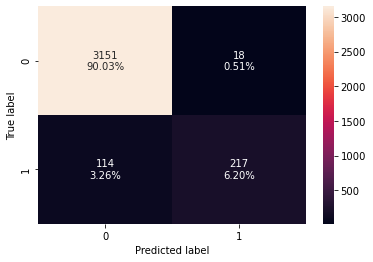

In [62]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [63]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962286,0.655589,0.923404,0.766784


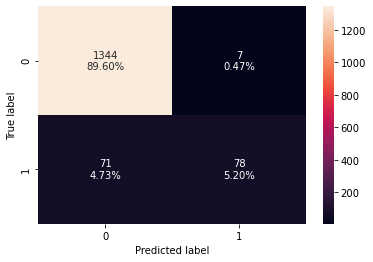

In [64]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [65]:

log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.948,0.52349,0.917647,0.666667


### Observations
- CASE1: Accuracy for loan buying prediction: Accuracy is high;model performs well
- CASE2: Recall is poor; model did not perform well.

Next step: Use the ROC curve and AUC score to determine optimal threshold value for model.

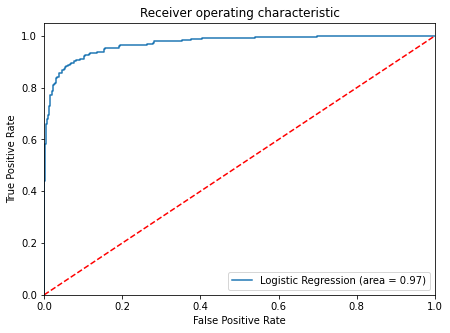

In [66]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

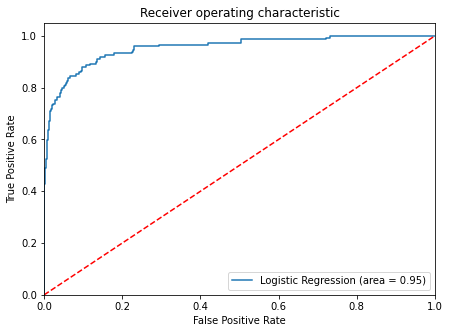

In [67]:
# Find the roc auc score for test data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.16235960509703373


### Optimal threshold is ~0.16

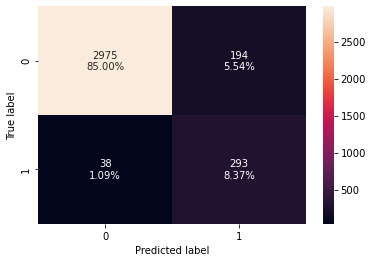

In [69]:
# creating confusion matrix for training data
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [70]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.933714,0.885196,0.601643,0.716381


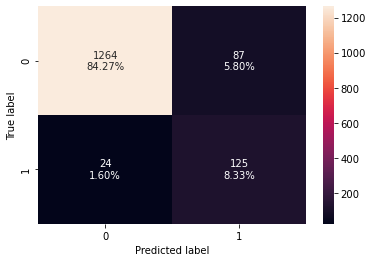

In [71]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [72]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.926,0.838926,0.589623,0.692521


# Observations
- Use of Optimal Threshold decreases the Accuracy (CASE1) of  the model slightly but raises the recall (CASE2) significantly. Therefore, model improvement is improved. 

Next step: Explore the use of the Precion - Recall curve to determine if a better threshold exsts for the model.

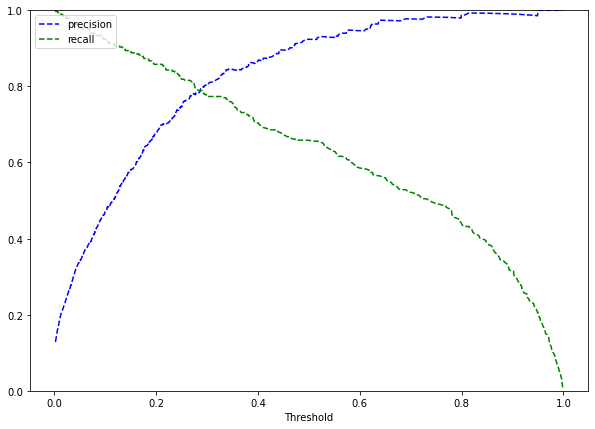

In [73]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### Observations
Precision-Recall intersection is ~0.3; therefore, test an optimal threshhold of 0.3.

In [74]:
# setting the threshold
optimal_threshold_curve = 0.3

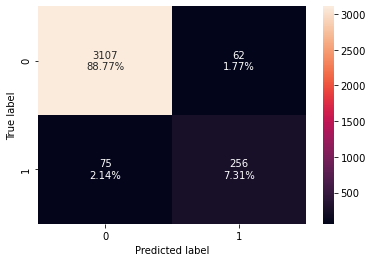

In [75]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [76]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.960857,0.773414,0.805031,0.788906


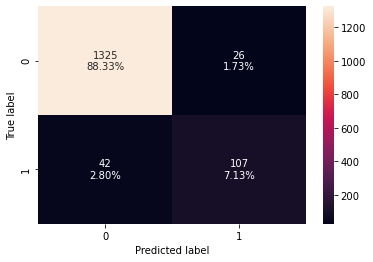

In [77]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [78]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.954667,0.718121,0.804511,0.758865


## Observations and Evaluation - Logistic regression
Case1: In case 1 where accuracy is important (no concern over lone repayment) all three models have accuracy rates > 90% with best results when the model threshold is 0.3
Case2: In case 2 where recall is important (and repayment of loan is important) the best model results are delivered with Model 2 (threshold is 0.16). 

A model that delivers a balance among accuracy, precision and recall is model 3.

In [79]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.16 Threshold",
    "Logistic Regression-0.3 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.16 Threshold,Logistic Regression-0.3 Threshold
Accuracy,0.948000,0.926000,0.954667
Recall,0.523490,0.838926,0.718121
Precision,0.917647,0.589623,0.804511
F1,0.666667,0.692521,0.758865


# Decision Tree (Using code in Online Shoppers Purchase Case Study Jupyter Notebook)

In [80]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [81]:
## Function to calculate accuracy score
def get_accuracy_score(model, predictors,target):
    prediction = model.predict(predictors)

    return accuracy_score(target,prediction)

In [82]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [83]:
model_DT = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [84]:
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

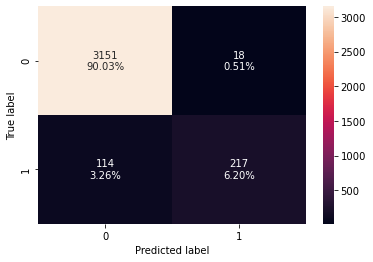

In [85]:
confusion_matrix_sklearn(model, X_train, y_train)

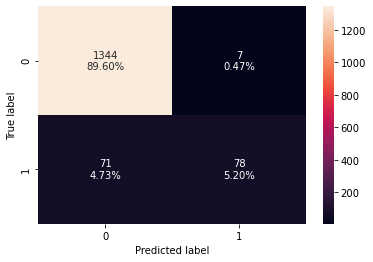

In [86]:
confusion_matrix_sklearn(model, X_test, y_test)

In [87]:
decision_tree_perf_train_recall = get_recall_score(model_DT, X_train, y_train)
decision_tree_perf_train_accuracy = get_accuracy_score(model_DT, X_train, y_train)

print("Recall Score:", decision_tree_perf_train_recall)
print('Accuracy Score:',decision_tree_perf_train_accuracy)

Recall Score: 1.0
Accuracy Score: 1.0


In [88]:
decision_tree_perf_test_recall = get_recall_score(model_DT, X_test, y_test)
decision_tree_perf_test_accuracy = get_accuracy_score(model_DT, X_test, y_test)

print("Recall Score:", decision_tree_perf_test_recall)
print('Accuracy Score:',decision_tree_perf_test_accuracy)

Recall Score: 0.8523489932885906
Accuracy Score: 0.978


In [89]:
#Visualize the decision tree
## creating a list of column names
feature_names = X_train.columns.to_list()

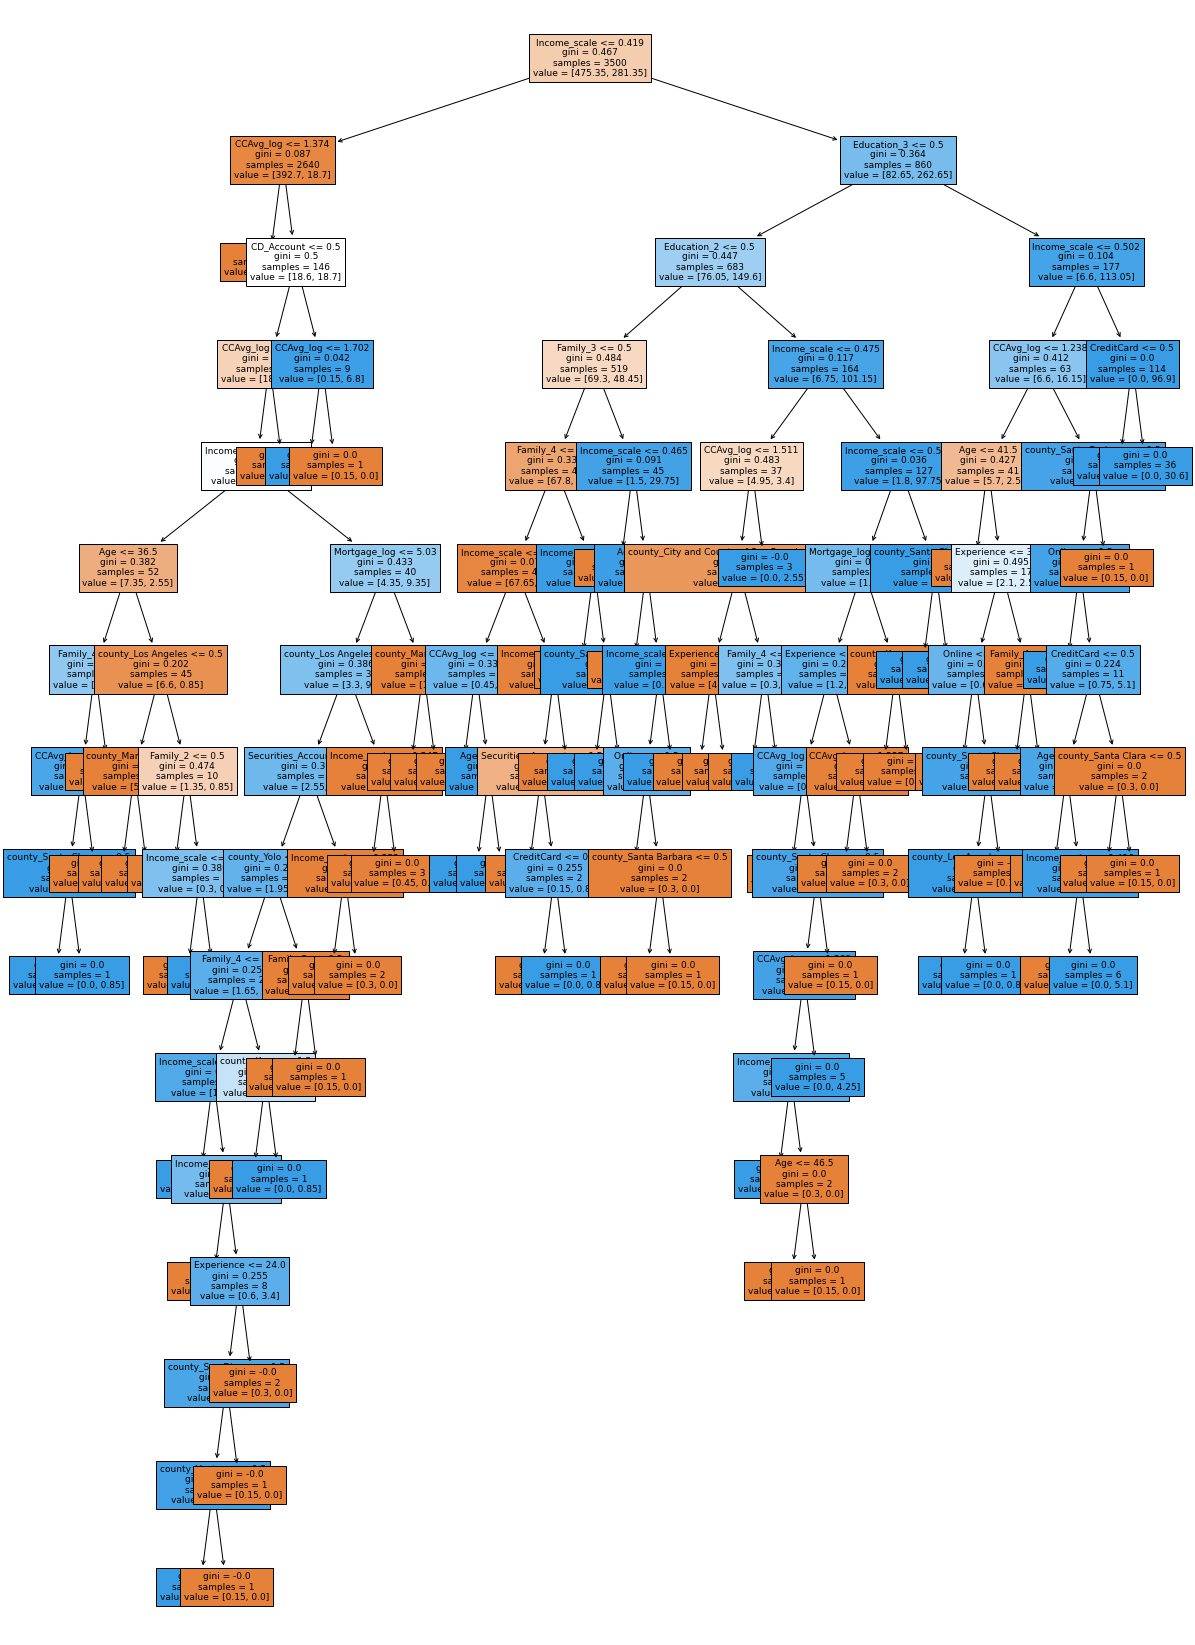

In [92]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model_DT,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [94]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model_DT, feature_names=feature_names, show_weights=True))

|--- Income_scale <= 0.42
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_log <= 1.60
|   |   |   |   |--- Income_scale <= 0.34
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg_log <= 1.50
|   |   |   |   |   |   |   |   |--- county_Santa Clara <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- county_Santa Clara >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg_log >  1.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- county_Los Angeles <= 0.50
|   |   |   |   |   |   |   |--- co

### Observation
Model performance is very good however 
The Decision tree is too complex and is likely overfitting

In [95]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model_DT.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                  Imp
Income_scale                             5.954997e-01
Education_2                              8.813411e-02
CCAvg_log                                8.004803e-02
Family_4                                 7.226336e-02
Family_3                                 7.032437e-02
Education_3                              3.514783e-02
CD_Account                               1.099955e-02
Age                                      9.302030e-03
Experience                               6.975073e-03
Mortgage_log                             5.165754e-03
Securities_Account                       4.976279e-03
county_Los Angeles                       3.773823e-03
Online                                   3.711667e-03
county_City and County of San Francisco  2.849891e-03
CreditCard                               2.081199e-03
county_Kern                              1.990057e-03
Family_2                                 1.696563e-03
county_Santa Clara          

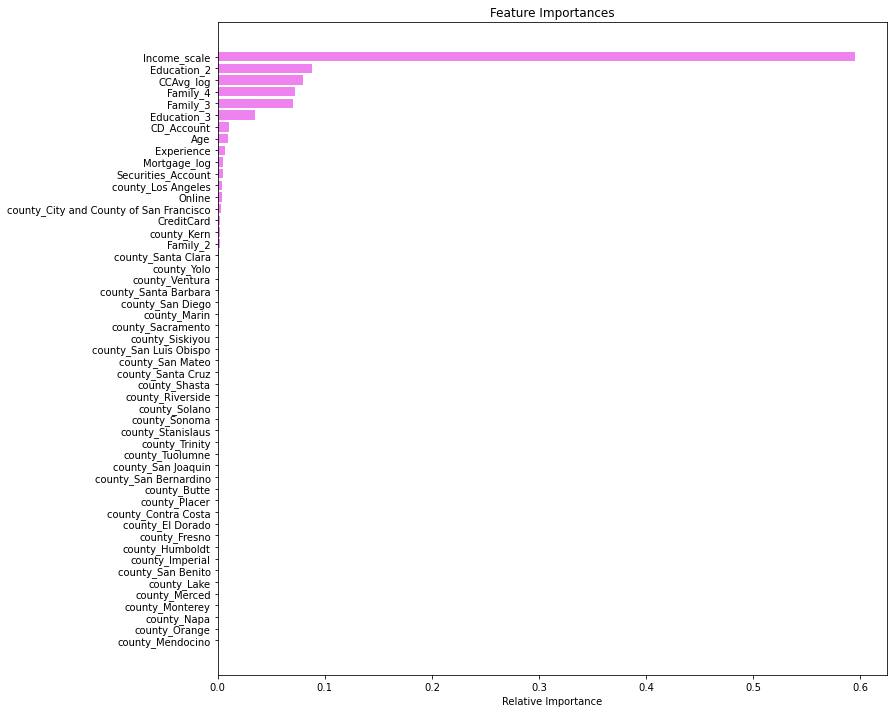

In [97]:
importances = model_DT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations
The key variables that have a strong relationship with the independent variable are Income, Education, CCAvg, Family, Age and the presence of a CD Account.
Income has the greatest impact on Personal Loan.

## Pruning
For the sake of this model, I will consider CASE2: Aliabililty customer will not only take out a loan but will also be more likely to repay the loan.

In [98]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

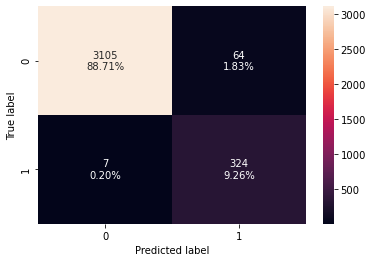

In [99]:
#Model performance on train set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [100]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9788519637462235


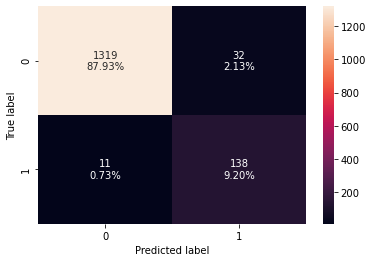

In [101]:
#Model performance on test data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [102]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9261744966442953


### Obsrvations
The recall score the test and train sets are relatively close (.93 and .98, respectively). Model may still be overfitting.

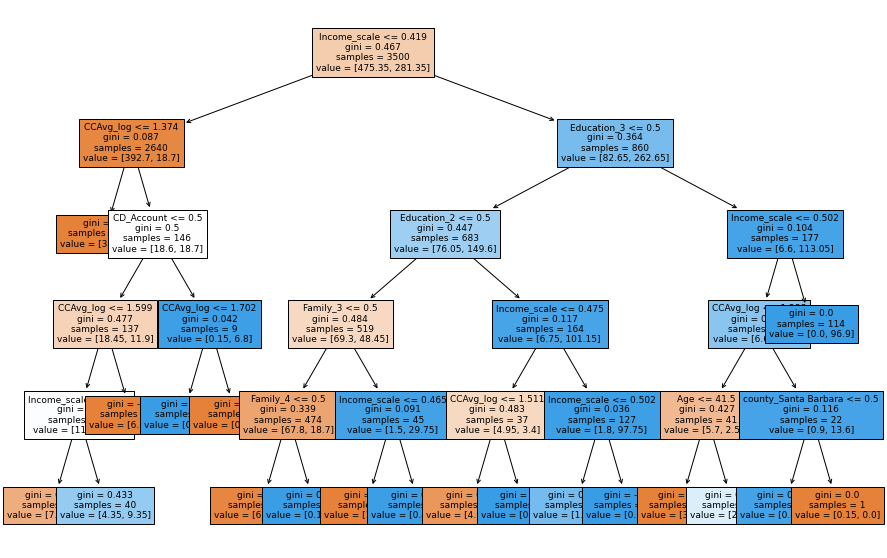

In [103]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)



                                              Imp
Income_scale                             0.621903
Education_2                              0.094486
CCAvg_log                                0.081135
Family_3                                 0.075392
Family_4                                 0.073101
Education_3                              0.037681
CD_Account                               0.011792
Age                                      0.003701
county_Santa Barbara                     0.000809
county_Santa Clara                       0.000000
county_San Bernardino                    0.000000
county_San Benito                        0.000000
county_Sacramento                        0.000000
county_Riverside                         0.000000
county_San Joaquin                       0.000000
county_San Luis Obispo                   0.000000
county_San Mateo                         0.000000
county_San Diego                         0.000000
county_Solano                            0.000000


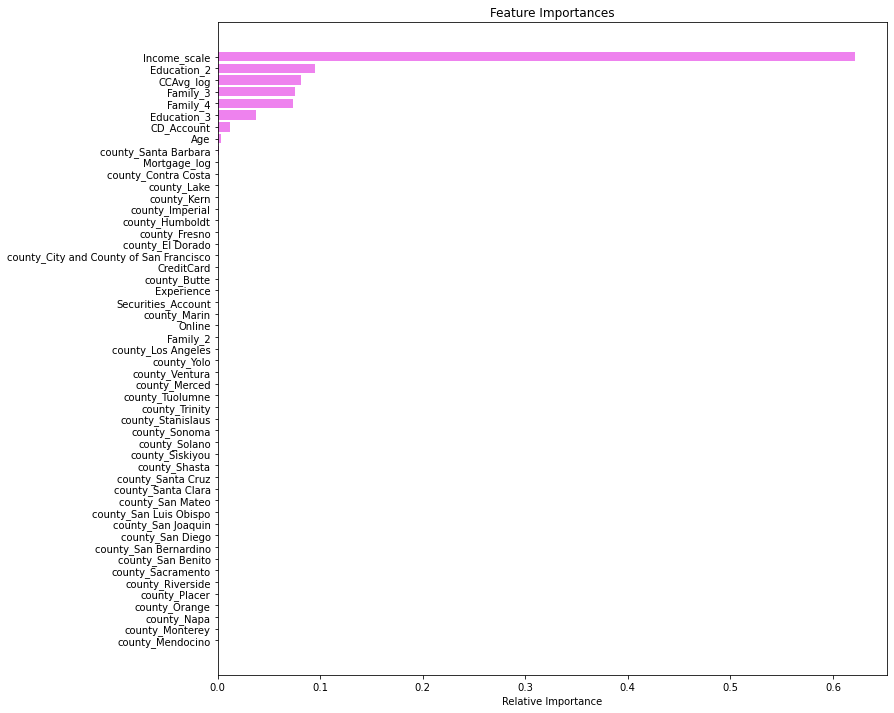

In [106]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Obsevations
Model complexity is greatly reduced with estimator and importance of features has increased.


## Cost Complexity Pruning

In [107]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [108]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.496314e-16
1,1.320471e-19,-1.494994e-16
2,1.320471e-19,-1.493673e-16
3,7.482671e-19,-1.486191e-16
4,7.482671e-19,-1.478708e-16
5,7.482671e-19,-1.471225e-16
6,1.760629e-18,-1.453619e-16
7,2.332833e-18,-1.430291e-16
8,2.905037e-18,-1.401240e-16
9,4.621650e-18,-1.355024e-16


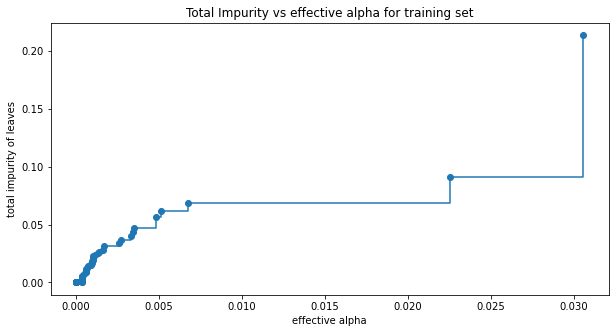

In [109]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [110]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948091


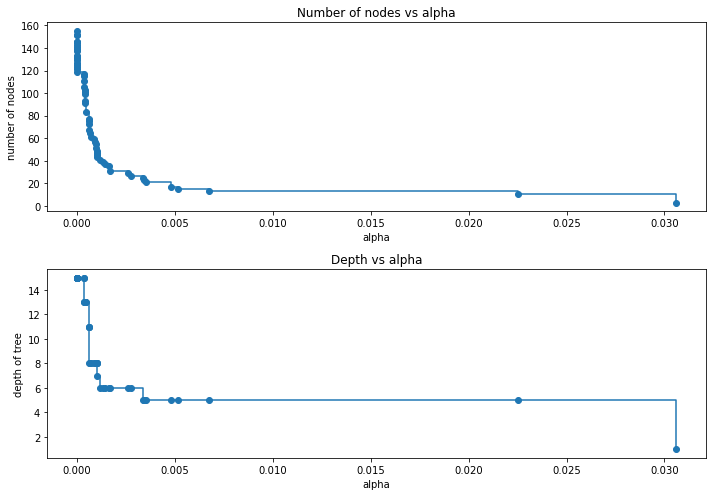

In [111]:
#emove the last element in clfs and ccp_alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [112]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [113]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [114]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

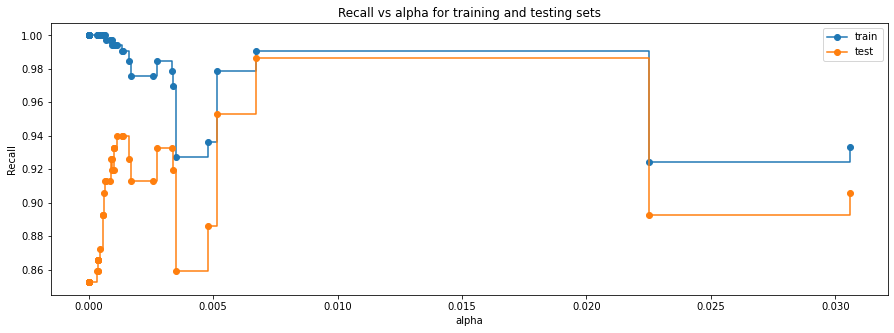

In [115]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [116]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690407107,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


### Maximum value of Recall is at 0.007 alpha

In [117]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690407107,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

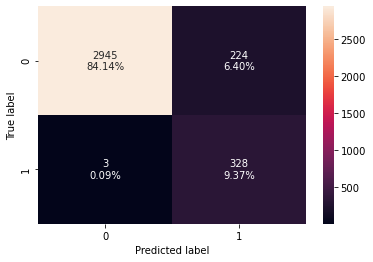

In [118]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [119]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9909365558912386


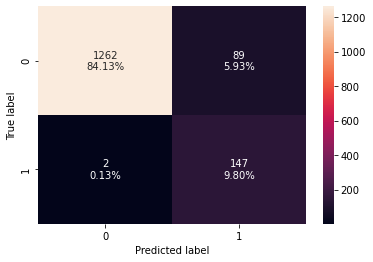

In [120]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [121]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9865771812080537


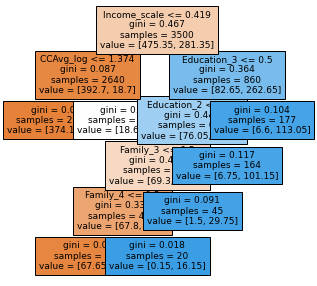

In [122]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [123]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.010, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

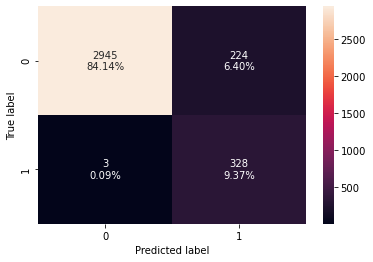

In [124]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [125]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9909365558912386


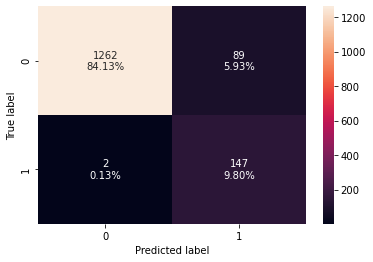

In [126]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [127]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9865771812080537


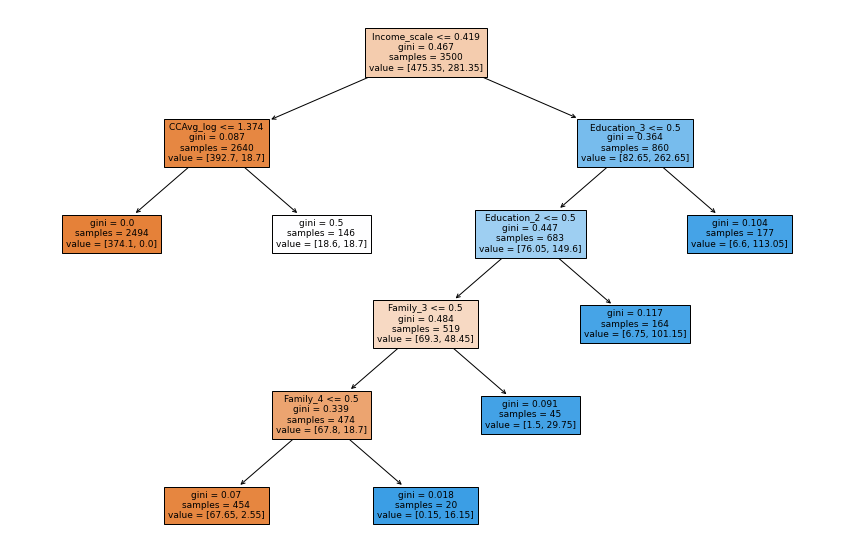

In [128]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                              Imp
Income_scale                             0.636685
Education_2                              0.103283
Family_3                                 0.082412
Family_4                                 0.079906
CCAvg_log                                0.056525
Education_3                              0.041189
county_San Joaquin                       0.000000
county_San Mateo                         0.000000
county_San Luis Obispo                   0.000000
Age                                      0.000000
county_Santa Clara                       0.000000
county_San Diego                         0.000000
county_San Bernardino                    0.000000
county_San Benito                        0.000000
county_Sacramento                        0.000000
county_Riverside                         0.000000
county_Santa Barbara                     0.000000
county_Siskiyou                          0.000000
county_Santa Cruz                        0.000000


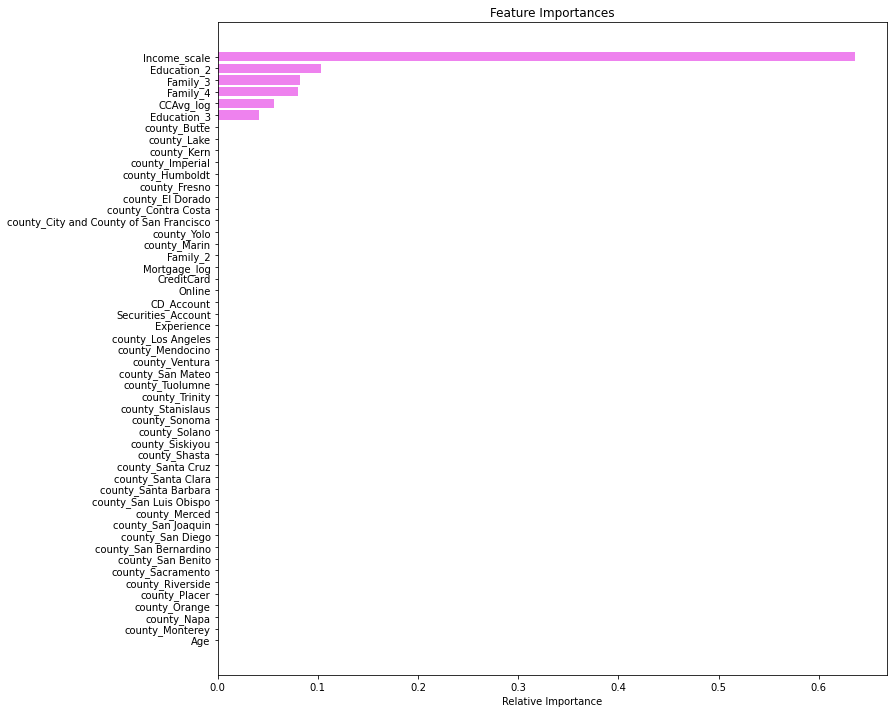

In [130]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()